# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#url = url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
#query_url = f"{url}appid={weather_api_key}&units={units}q="


#list 
record = 0
city_nm = []
cloudiness = []
country = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


for city in cities:
    record += 1
    url = url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    query_url = url + 'appid='+ weather_api_key + '&units=imperial' + "&q=" + city
    response = requests.get(query_url)
    city_json = response.json()
    if (str(response) =='<Response [200]>'):
        print(f"Processing Record{record}: {city}")
        city_nm.append(city_json["name"])
        cloudiness.append(city_json["clouds"]["all"])
        country.append(city_json["sys"]["country"])
        humidity.append(city_json["main"]["humidity"])
        lat.append(city_json["coord"]["lat"])
        lng.append(city_json["coord"]["lon"])
        max_temp.append(city_json["main"]["temp_max"])
        wind_speed.append(city_json["wind"]["speed"]) 
    else:
              print("City is not found. Skip")
              

Processing Record1: conde
Processing Record2: new norfolk
Processing Record3: busselton
Processing Record4: avera
City is not found. Skip
Processing Record6: nome
Processing Record7: barrow
Processing Record8: egvekinot
City is not found. Skip
Processing Record10: bluff
Processing Record11: ushuaia
Processing Record12: dalvik
City is not found. Skip
Processing Record14: antalaha
Processing Record15: hokitika
Processing Record16: jamestown
Processing Record17: beyneu
Processing Record18: fare
Processing Record19: chatham
Processing Record20: abu zabad
Processing Record21: dombarovskiy
Processing Record22: upernavik
Processing Record23: bethel
Processing Record24: dunedin
Processing Record25: mahebourg
City is not found. Skip
Processing Record27: palmer
City is not found. Skip
Processing Record29: hobart
Processing Record30: cabo san lucas
Processing Record31: punta arenas
Processing Record32: khatanga
Processing Record33: bani walid
Processing Record34: portland
Processing Record35: car

Processing Record276: balabac
City is not found. Skip
Processing Record278: kalakamati
Processing Record279: faanui
Processing Record280: port-gentil
Processing Record281: mapiripan
Processing Record282: kirkkonummi
Processing Record283: thinadhoo
Processing Record284: florence
Processing Record285: kytmanovo
Processing Record286: shache
Processing Record287: vilyuysk
Processing Record288: mackenzie
Processing Record289: port macquarie
Processing Record290: gushikawa
Processing Record291: erenhot
Processing Record292: alugan
Processing Record293: port hawkesbury
Processing Record294: jalor
Processing Record295: maceio
Processing Record296: shenzhen
Processing Record297: saint-augustin
Processing Record298: waitati
Processing Record299: talnakh
Processing Record300: formosa do rio preto
Processing Record301: esperance
Processing Record302: tsabong
Processing Record303: darnah
Processing Record304: fairhope
Processing Record305: pangai
Processing Record306: kyabram
Processing Record307: 

Processing Record540: abnub
Processing Record541: kushiro
Processing Record542: nhulunbuy
Processing Record543: inirida
Processing Record544: staroye drozhzhanoye
Processing Record545: silver city
Processing Record546: barretos
Processing Record547: livezile
Processing Record548: humaita
Processing Record549: saint-pierre
Processing Record550: oriximina
Processing Record551: petropavlovsk-kamchatskiy
Processing Record552: koutiala
Processing Record553: maningrida
Processing Record554: svetlogorsk
Processing Record555: huinan
Processing Record556: ichnya
Processing Record557: jizan
City is not found. Skip
Processing Record559: itupiranga
Processing Record560: guder
Processing Record561: laguna
Processing Record562: havre-saint-pierre
Processing Record563: jumla
Processing Record564: ust-kuyga
Processing Record565: la grande
Processing Record566: kyabe
Processing Record567: mangan
Processing Record568: pinawa
Processing Record569: youghal
Processing Record570: kamennomostskiy
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_dict = {'City':city_nm,
               'Cloudiness':cloudiness,
               'Country':country,
               'Humidity':humidity,
               'Lat':lat,
               'Lng':lng,
               'Max Temp': max_temp,
               'Wind Speed':wind_speed}
weatherDf = pd.DataFrame(weather_dict)


In [16]:
city_export = weatherDf.to_csv (output_data_file, index = None, header=True)
weatherDf.count()

City          577
Cloudiness    577
Country       577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

In [7]:
weatherDf.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Conde,75,BR,74,-7.26,-34.91,82.40,13.87
1,New Norfolk,99,AU,64,-42.78,147.06,55.99,1.01
2,Busselton,0,AU,77,-33.65,115.33,54.00,1.01
3,Avera,90,US,66,33.19,-82.53,48.20,11.41
4,Nome,90,US,92,64.50,-165.41,19.40,18.34


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

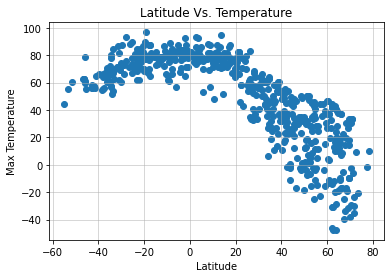

In [18]:
x_values = weatherDf['Lat']
y_values = weatherDf['Max Temp']
plt.scatter(x_values,y_values)
plt.title('Latitude Vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)
plt.savefig("../WeatherPy/latvstemp.png")
plt.show()

## Latitude vs. Humidity Plot

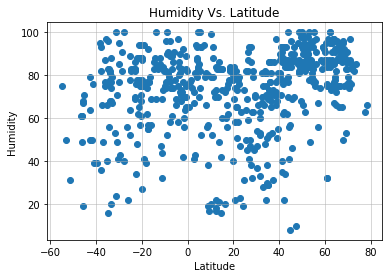

In [19]:
x_values = weatherDf['Lat']
y_values = weatherDf['Humidity']
plt.scatter(x_values,y_values)
plt.title('Humidity Vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)
plt.savefig("../WeatherPy/latvshum.png")

plt.show()

## Latitude vs. Cloudiness Plot

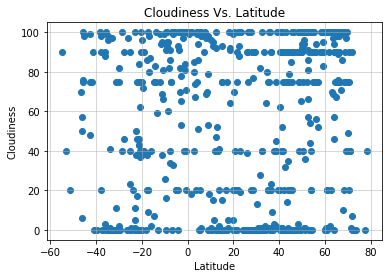

In [20]:
x_values = weatherDf['Lat']
y_values = weatherDf['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('Cloudiness Vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)
plt.savefig("../WeatherPy/latvscloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

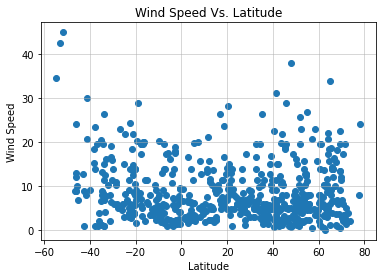

In [22]:
x_values = weatherDf['Lat']
y_values = weatherDf['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('Wind Speed Vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)
plt.savefig("../WeatherPy/latvsWS.png")
plt.show()

## Linear Regression

In [135]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

0      8.328336
1      8.516996
2      8.492771
3      8.448971
4      8.716667
         ...   
557    8.685346
558    7.966921
559    7.577366
560    7.733237
561    8.250278
Name: Lat, Length: 562, dtype: float64


In [136]:
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

y = 0.01x +7.98


In [24]:
northern_hem = weatherDf[weatherDf['Lat'] >= 0]
southern_hem = weatherDf[weatherDf['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.31x +90.52
The r-value is: 0.6716898376030823


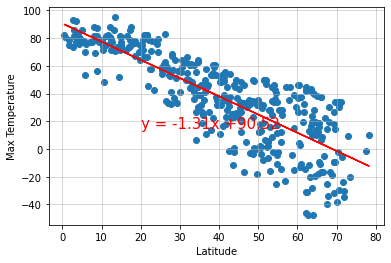

In [25]:
x_values = northern_hem['Lat']
y_values = northern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.savefig("../WeatherPy/NHtempvslat.png")
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.43x +82.95
The r-value is: 0.3587930386374093


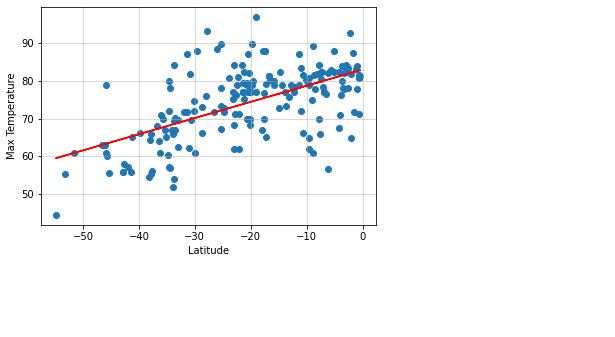

In [26]:
x_values = southern_hem['Lat']
y_values = southern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.savefig("../WeatherPy/SHtempvslat.png")


print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.33x +60.83
The r-value is: 0.11270969359026192


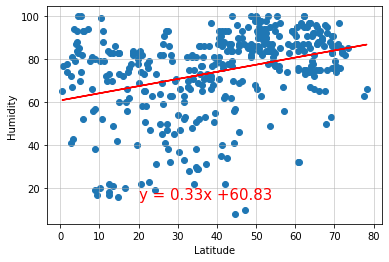

In [27]:
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.savefig("../WeatherPy/NHlatvshum.png")
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.35x +79.04
The r-value is: 0.06780204431983522


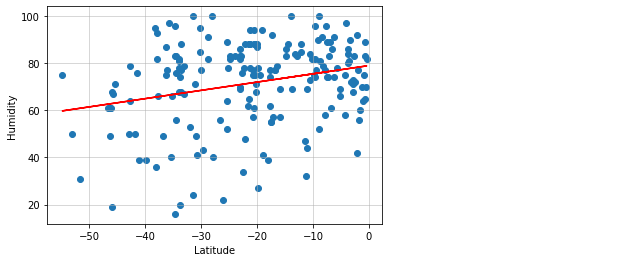

In [28]:
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.savefig("../WeatherPy/SHlatvshum.png")


print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.41x +37.55
The r-value is: 0.04058652798694516


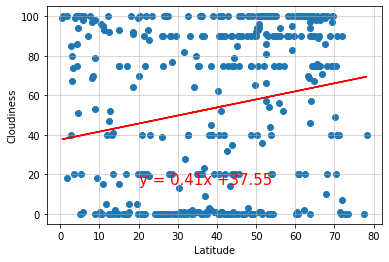

In [29]:
x_values = northern_hem['Lat']
y_values = northern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.savefig("../WeatherPy/NHcloudvslat.png")


print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.82x +69.62
The r-value is: 0.07987062822790096


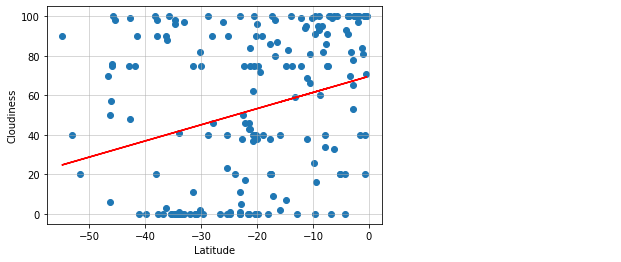

In [30]:
x_values = southern_hem['Lat']
y_values = southern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.savefig("../WeatherPy/SHcloudvslat.png")


print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.03x +7.12
The r-value is: 0.007077042298317871


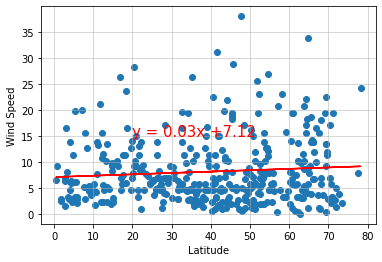

In [31]:
x_values = northern_hem['Lat']
y_values = northern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.savefig("../WeatherPy/NHWSvslat.png")


print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.19x +5.83
The r-value is: 0.11591086745673351


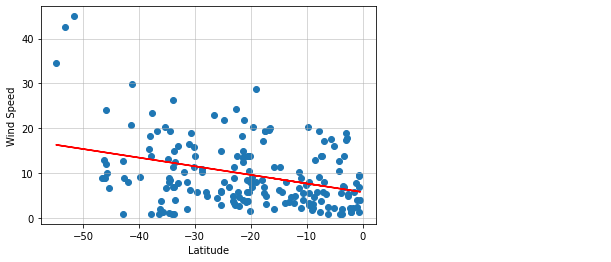

In [32]:
x_values = southern_hem['Lat']
y_values = southern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(linestyle = '-', linewidth = 1, alpha = 0.5)
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.savefig("../WeatherPy/SHWSvslat.png")


print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()